In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image


import pathlib

tf.config.list_physical_devices("GPU")

[]

In [ ]:
from google.colab import drive
from sklearn.utils.class_weight import compute_class_weight

drive.mount('/content/drive')

!cp -r "/content/drive/MyDrive/TxState/2025_Fall/Plant_Project/plant-seedlings-classification" /content/

train_path = "/content/plant-seedlings-classification/train"
test_path = "/content/plant-seedlings-classification/test"

IMG_SIZE = 82
BATCH_SIZE = 32

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.,
    rotation_range=25,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = image_generator.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='training',
    shuffle=True
)

val_generator = image_generator.flow_from_directory(
    train_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
    subset='validation',
    shuffle=True
)

class_indices = train_generator.class_indices
idx_to_class = {v: k for k, v in class_indices.items()}

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 3840 images belonging to 12 classes.
Found 955 images belonging to 12 classes.
Class weights: {0: np.float64(1.5165876777251184), 1: np.float64(0.9846153846153847), 2: np.float64(1.391304347826087), 3: np.float64(0.65439672801636), 4: np.float64(1.807909604519774), 5: np.float64(0.8421052631578947), 6: np.float64(0.6106870229007634), 7: np.float64(1.807909604519774), 8: np.float64(0.7729468599033816), 9: np.float64(1.7297297297297298), 10: np.float64(0.7804878048780488), 11: np.float64(1.0062893081761006)}


In [ ]:
test_dir = pathlib.Path(test_path)
test_files = list(test_dir.glob("*.png"))
len(test_files)
print(train_generator.num_classes)


12


In [ ]:
# Model 2, Convolutional Neural Network

model2 = keras.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", padding="same", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3,3), activation="relu", padding="same"),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),

    layers.Dense(train_generator.num_classes, activation='softmax')
])


model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model2.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    class_weight=class_weights
)



/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.1707 - loss: 3.2068 - val_accuracy: 0.0461 - val_loss: 9.1624
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.3210 - loss: 1.9720 - val_accuracy: 0.0461 - val_loss: 7.9948
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.4289 - loss: 1.6569 - val_accuracy: 0.0482 - val_loss: 8.0795
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.4913 - loss: 1.4362 - val_accuracy: 0.1424 - val_loss: 4.4786
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.5715 - loss: 1.2456 - val_accuracy: 0.3330 - val_loss: 2.3435
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.6405 - loss: 1.0186 - val_accuracy: 0.5571 - val_loss: 1.2824
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.6694 - loss: 0.9979 - val_accuracy: 0.4346 - val_loss: 1.9473
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7053 - loss: 0.8553 - val_accu

In [ ]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 82, 82, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 82, 82, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 41, 41, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 41, 41, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 20, 20, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 20, 20, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 10, 10, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     1,638,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 12)             │         1,548 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,188,390 (23.61 MB)

 Trainable params: 2,062,476 (7.87 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 4,124,954 (15.74 MB)

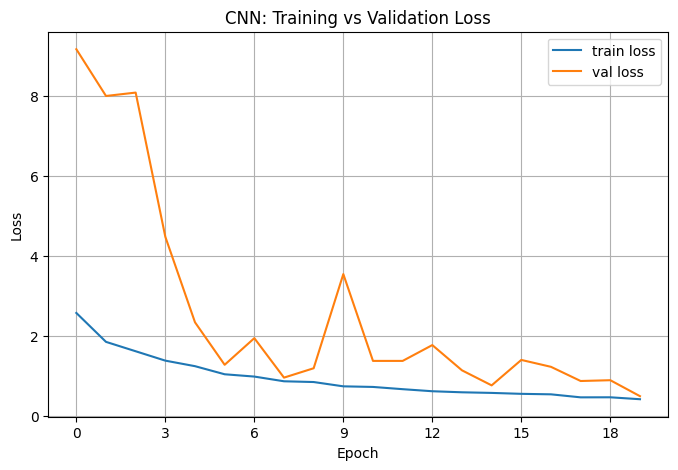

In [ ]:
from matplotlib.ticker import MaxNLocator

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('CNN: Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

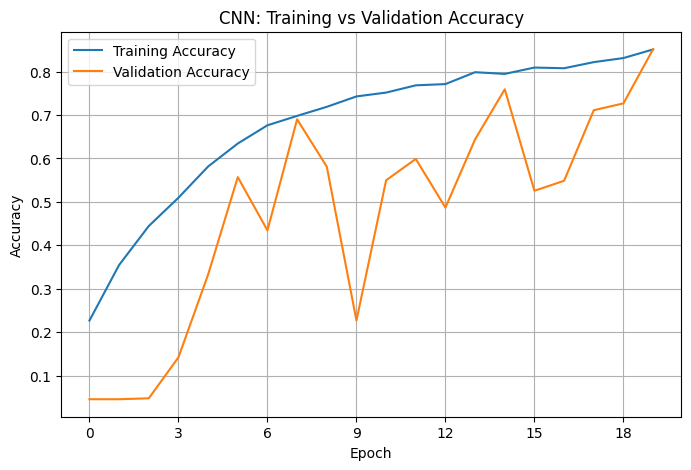

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.title('CNN: Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
predictions = []


def load_test_image(path):
    img = image.load_img(path, target_size=(IMG_SIZE, IMG_SIZE))
    img = image.img_to_array(img) / 255.0
    return np.expand_dims(img, axis=0)

for path in test_files:
    img = load_test_image(path)
    probs = model2.predict(img, verbose=0)
    pred_idx = np.argmax(probs)
    pred_class = idx_to_class[pred_idx]
    predictions.append([path.name, pred_class])

df = pd.DataFrame(predictions, columns=["file", "species"])
df.to_csv("seedling_predictions_model2.csv", index=False)